In [237]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

years = np.array([1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0, 2010.0, 2020.0])
population = np.array([21.0, 29.0, 39.0, 48.5, 63.0, 83.0, 94.0, 110.0])

year = 2019
population2019 = 108

In [238]:
def ComputeS(years, n, k):
    s = 0
    for i in range(n):
        s += years[i]**k
    return s

def ComputeB(population, years, n, k):
    b = 0
    for i in range(n):
        b += population[i] * years[i]**k
    return b

def FillLeastSqMatrices(A, b, years, population, m, n):
    for k in range(m + 1):
        for i in range(n + 1):
            b[k] += population[i] * years[i]**k
            A[0][k] += years[i]**k
            A[m][k] += years[i]**(k + m)
    #print(A)
    for j in range(m + 1):
        A[j][m - j] = A[0][m]
        for k in range(1, j + 1):
            A[k][j - k] = A[0][j]
        for k in range(1, m - j + 1):
            A[m - k][j + k] = A[m][j]
            #print(A)
    return A, b

def ComputePolynomValue(polynom, year):
    result = 0
    m = len(polynom)
    for i in range(m):
        #print(polynom[i] * years[j]**i)
        result += polynom[i] * year**i
    return result

def StandardDeviation(NewPolynom, years, population, n, m):
    result = 0
    for i in range(n + 1):
        #result += (NewPolynom[j] * years[i]**j - population[i])**2
        result += (ComputePolynomValue(NewPolynom, years[i]) - population[i])**2
    return (result/(n + 1))**0.5

In [239]:
a = []
for i in range(6):
    a.append([0] * (i + 1))
s = ComputeS(years, 7, 0)
b = ComputeB(population, years, 7, 0)
a[0][0] = b/s

for i in range(1, 6):
    A = []
    for j in range(i + 1):
        A.append([0]*(i + 1))
    b = np.zeros(i + 1)
    FillLeastSqMatrices(A, b, years, population, i, 7)
    a[i] = np.linalg.solve(A, b)

In [240]:
def Interpolate(population, years, n):
    X = []
    for i in range(n + 1):
        X.append([0]*(n + 1))
    for i in range(n + 1):
        for j in range(n + 1):
            X[i][j] = years[i]**j
    return np.linalg.solve(X, population)

def Lagrange(population, years, x0, n):
    res = 0
    max_n = min(population.size, n)
    for i in range(max_n):
        a = 1
        for j in range(max_n):
            if (i != j):
                a = a * (x0 - years[j])/(years[i] - years[j])
        res = res + population[i] * a
    return res

#ab = Interpolate(population, years, 7)
#ab = Lagrange(population, years, 2019)

res = 0
for i in range(6):
    print("LQ polynom degree", i, "at 2019.0: ", ComputePolynomValue(a[i], 2019.0))
print("Interpolated polynom at 2019.0:", Lagrange(population, years, 2019.0, population.size))
print("True value: ", population2019)

minD = StandardDeviation(a[0], years, population, 7, 0)
minI = 0
for i in range(1, 6):
    newM = StandardDeviation(a[i], years, population, 7, i)
    if (newM < minD):
        minD = newM
        minI = i
print("The most accurate LQ polynom: degree", minI, "and its Standard Deviation:", minD)

LQ polynom degree 0 at 2019.0:  53.92857142857143
LQ polynom degree 1 at 2019.0:  105.23869047619928
LQ polynom degree 2 at 2019.0:  109.61437496366852
LQ polynom degree 3 at 2019.0:  108.55333920801058
LQ polynom degree 4 at 2019.0:  108.56220279727131
LQ polynom degree 5 at 2019.0:  108.53419672558084
Interpolated polynom at 2019.0: 105.221640795625
True value:  108
The most accurate LQ polynom: degree 5 and its Standard Deviation: 1.5624389846352043


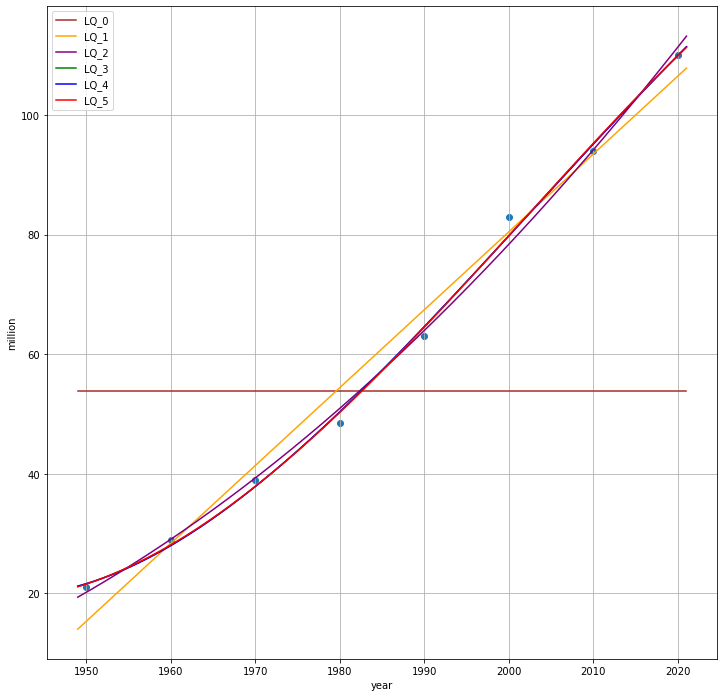

In [241]:
plt.figure(figsize = (12, 12))
plt.xlabel("year")
plt.ylabel("million")
plt.grid()

x1 = np.linspace(1949, 2021, 500)

plt.plot(x1, ComputePolynomValue(a[0], x1), color = "brown", label = "LQ_0")
plt.plot(x1, ComputePolynomValue(a[1], x1), color = "orange", label = "LQ_1")
plt.plot(x1, ComputePolynomValue(a[2], x1), color = "purple", label = "LQ_2")
plt.plot(x1, ComputePolynomValue(a[3], x1), color = "green", label = "LQ_3")
plt.plot(x1, ComputePolynomValue(a[4], x1), color = "blue", label = "LQ_4")
plt.plot(x1, ComputePolynomValue(a[5], x1), color = "red", label = "LQ_5")
plt.scatter(years, population)
plt.legend()

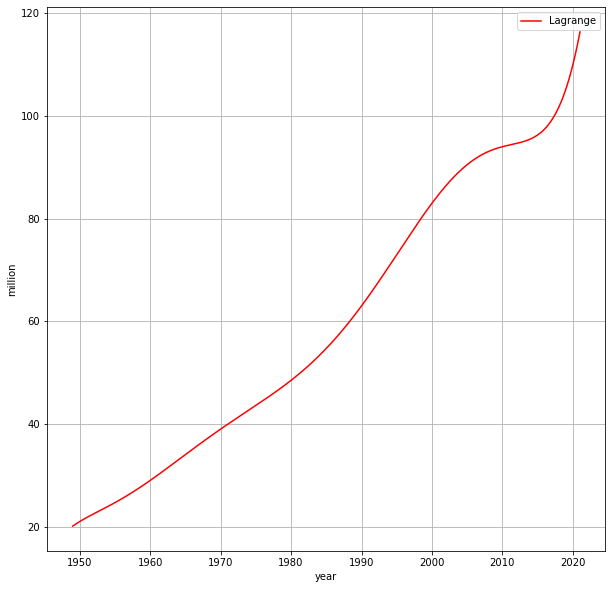

In [242]:
plt.figure(figsize = (10, 10))
plt.xlabel("year")
plt.ylabel("million")
plt.plot(x1, Lagrange(population, years, x1, population.size), color = "red", label = "Lagrange")
plt.grid()
plt.legend()

1.6399285129745923e+38


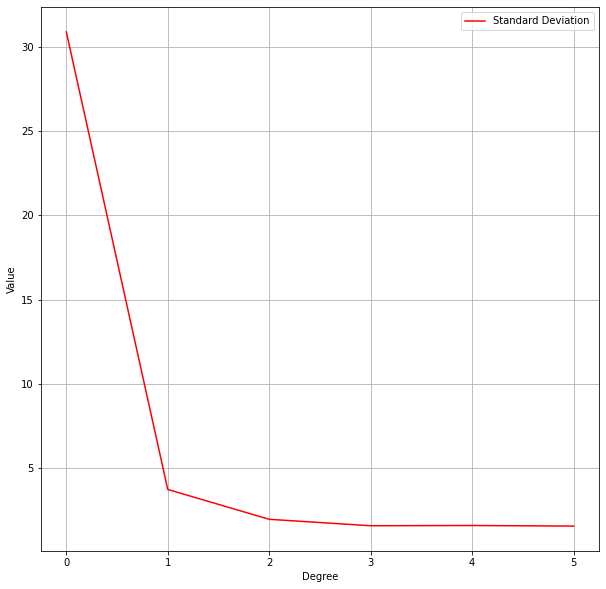

In [243]:
plt.figure(figsize = (10, 10))
x1 = [0, 1, 2, 3, 4, 5]
plt.xlabel("Degree")
plt.ylabel("Value")
y = np.array([StandardDeviation(a[0], years, population, 7, 0), StandardDeviation(a[1], years, population, 7, 1),
             StandardDeviation(a[2], years, population, 7, 2), StandardDeviation(a[3], years, population, 7, 3),
             StandardDeviation(a[4], years, population, 7, 4), StandardDeviation(a[5], years, population, 7, 5)])
plt.plot(x1, y, color = "red", label = "Standard Deviation")
plt.grid()
plt.legend()

print(np.linalg.cond(A))

In [261]:
# xsin(xx) at [0, pi/2], eps = 0.001
import math
def F(x):
    return x * np.sin(x*x)

a = 0
b = math.pi/2
eps = 0.001
n_min_Lagrange = 4
n_min_Newton = 4
x = np.linspace(a, b, 4)
y = F(x)
print(x)
print(y)

def Difference(x, y, n):
    n_max = min(y.size - 1, n)
    h = x[1] - x[0]
    saveY = y
    res = np.zeros(n_max)
    newY = np.zeros(saveY.size - 1)
    for i in range(n_max):
        for j in range(saveY.size - 1):
            newY[j] = saveY[j + 1] - saveY[j]
        res[i] = newY[0]
        saveY = newY
        newY = np.zeros(saveY.size - 1)
    return res

def Newton(x0, x, y, res, n):
    n_max = min(x.size - 1, n)
    h = x[1] - x[0]
    a = (x0 - x[0])/h
    result = y[0] + res[0] * a
    for i in range(1, n_max):
        a = a * (x0 - x[i]) / (h * (i + 1))
        result = result + res[i] * a
    return result

[0.         0.52359878 1.04719755 1.57079633]
[0.         0.14175612 0.93166062 0.98059467]


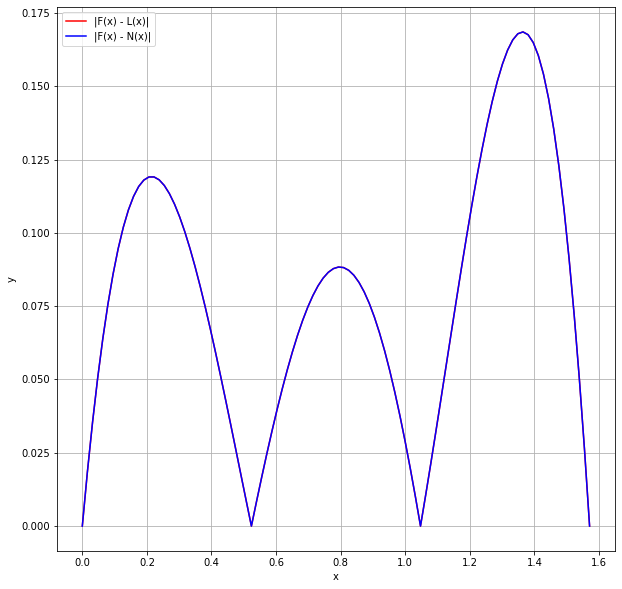

In [262]:
plt.figure(figsize = (10, 10))
plt.xlabel("x")
plt.ylabel("y")
x1 = np.linspace(a, b, 100)
plt.plot(x1, abs(F(x1) - Lagrange(y, x, x1, n_min_Lagrange)), color = "red", label = "|F(x) - L(x)|")
plt.plot(x1, abs(F(x1) - Newton(x1, x, y, Difference(x, y, n_min_Newton), n_min_Newton)), color = "blue", label = "|F(x) - N(x)|")
plt.grid()
plt.legend()

In [264]:
x_1 = np.linspace(a, b, 100)
flag = True
n = n_min_Lagrange
while flag:
    x_n = np.linspace(a, b, n)
    Lagr = [Lagrange(F(x_n), x_n, x0, n) for x0 in x_1]
    if np.amax(np.abs(Lagr - F(x_1))) < eps:
        n_min_Lagrange = n
        flag = False
    n += 1
    
n = n_min_Newton
flag = True
while flag:
    x_n = np.linspace(a, b, n)
    Newt = [Newton(x0, x_n, F(x_n), Difference(x_n, F(x_n), n), n) for x0 in x_1]
    if np.amax(np.abs(Newt - F(x_1))) < eps:
        n_min_Newton = n
        flag = False
    n += 1
print(n_min_Lagrange)
print(n_min_Newton)

9
9


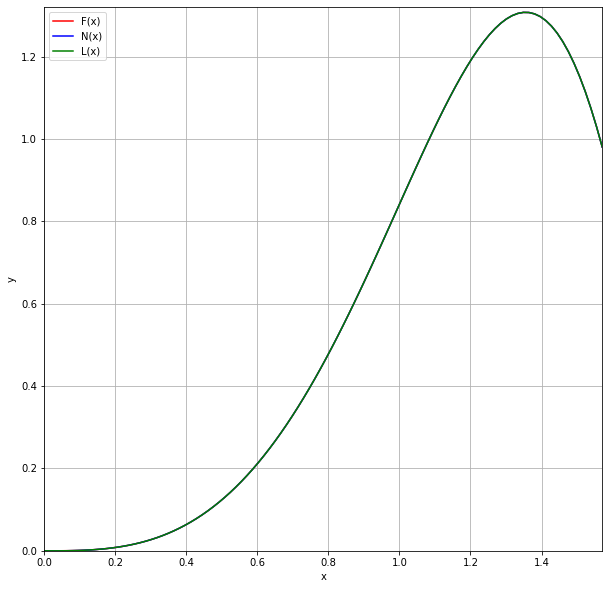

In [266]:
plt.figure(figsize = (10, 10))
plt.xlabel("x")
plt.ylabel("y")
x1 = np.linspace(a, b, 100)
x2 = np.linspace(a, b, n_min_Newton)
x3 = np.linspace(a, b, n_min_Lagrange)
plt.plot(x1, F(x1), color = "red", label = "F(x)")
plt.plot(x1, Newton(x1, x2, F(x2), Difference(x2, F(x2), n_min_Newton), n_min_Newton), color = "blue", label = "N(x)")
plt.plot(x1, Lagrange(F(x3), x3, x1, n_min_Lagrange), color = "green", label = "L(x)")

plt.axis([a, b, 0, 1.32])
plt.legend()
plt.grid()

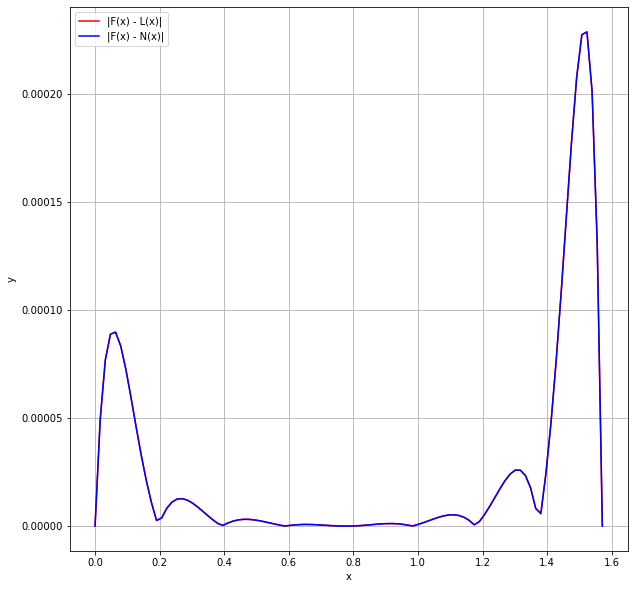

In [268]:
plt.figure(figsize = (10, 10))
plt.xlabel("x")
plt.ylabel("y")
x1 = np.linspace(a, b, 100)
plt.plot(x1, abs(F(x1) - Lagrange(F(x3), x3, x1, n_min_Lagrange)), color = "red", label = "|F(x) - L(x)|")
plt.plot(x1, abs(F(x1) - Newton(x1, x2, F(x2), Difference(x2, F(x2), n_min_Newton), n_min_Newton)), color = "blue", label = "|F(x) - N(x)|")
plt.grid()
plt.legend()